### Load dataset in dataframe

In [230]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import jsona
import numpy as np
from collections import Counter
from datetime import datetime

In [231]:
# Load user file into Pandas dataframe
df_user = pd.read_csv('takehome_users.csv', encoding = 'ISO-8859-1', parse_dates = [1,5])

df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [232]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


### Clean data by filling in missing values

In [233]:
# Create a list that stores the between the 'last_session_creation_time' and 'creation_time'
# Values less than 0, assuming the last login happens before user created the account, will be assigned 0

duration_list = []

for num in range(len(df_user)):
    
    if df_user.last_session_creation_time.values[num] == 'nan':
        duration_list.append(None)
    
    else:
        a1 = datetime.fromtimestamp(int(df_user.last_session_creation_time.values[num]))
        a2 = np.datetime64(a1)
        a3 = df_user.creation_time.values[num]
        a4 = int((a2 - a3)/ np.timedelta64(1, 'D'))
        
        if a4 >= 0:
            duration_list.append(a4)
        else:
            duration_list.append(0)
            
# Assign duration value in a column in dataframe and fill missing values with the mean
df_user['duration'] = duration_list
df_user['duration'] = df_user.duration.fillna(df_user.duration.mean())

In [234]:
# Fill missing value with 0
df_user['invited_by_user_id'] = df_user.invited_by_user_id.fillna(0)

In [235]:
df_user.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,135.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,4.0


In [236]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
duration                      12000 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 1.0+ MB


In [237]:
df_user.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.249500,0.149333,141.884583,3188.691333,58.565227
std,3464.24595,0.432742,0.356432,124.056723,3869.027693,123.500808
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,6000.50000,0.000000,0.000000,108.000000,875.000000,3.000000
75%,9000.25000,0.000000,0.000000,238.250000,6317.000000,58.565227
max,12000.00000,1.000000,1.000000,416.000000,11999.000000,728.000000


In [238]:
# Load user engagement file into Pandas dataframe
df_engage = pd.read_csv('takehome_user_engagement.csv', parse_dates = [0])

df_engage.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [239]:
# No missing value
df_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [240]:
df_engage.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


### Generate target variable (non-adopted vs adopted_user)

In [241]:
# Create dataframe by group by on user_id
df_engage_remix_by_user_id = df_engage.set_index('user_id').sort_values(by=['user_id','time_stamp'])
df_engage_remix_by_user_id.head(10)

,time_stamp,visited
user_id,,
1,2014-04-22 03:53:30,1
2,2013-11-15 03:45:04,1
2,2013-11-29 03:45:04,1
2,2013-12-09 03:45:04,1
2,2013-12-25 03:45:04,1
2,2013-12-31 03:45:04,1
2,2014-01-08 03:45:04,1
2,2014-02-03 03:45:04,1
2,2014-02-08 03:45:04,1


In [242]:
# Create function to determine whether a user has logged into the product on three separate days in at 
# least one seven-day period

def adopt_finder(subset):
    counter = 0
    
    if len(subset) >= 3:
        
        for num in range(len(subset)-2):
            a1 = subset.time_stamp.values[num]
            a2 = subset.time_stamp.values[num+2]
            a3 = (a2-a1) / np.timedelta64(1, 'D')

            if a3 <= 7:
                counter = 1
            else:
                pass            

        return counter
    
    else:
        
        return counter

In [243]:
# Assign 1 to adopted user and 0 to non-adopted user to a list

adopt_list = []
for num in range(len(df_user)):
    number = (num+1)
    adopt_list.append(adopt_finder(df_engage_remix_by_user_id[df_engage_remix_by_user_id.index == number]))

In [244]:
print(f'Total Number of users = {len(df_user)}')
print(f'Number of adopted users = {np.sum(adopt_list)}')
print(f'Ratio of adopted users = {np.sum(adopt_list)/len(df_user)}')

Total Number of users = 12000
Number of adopted users = 1656
Ratio of adopted users = 0.138


In [245]:
# Attached adopted list to df_user as a column
df_user['adopted_user'] = adopt_list

In [247]:
df_user.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,135.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,0.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,0.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,4.0,0


In [248]:
df_user.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,adopted_user
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.249500,0.149333,141.884583,3188.691333,58.565227,0.138000
std,3464.24595,0.432742,0.356432,124.056723,3869.027693,123.500808,0.344914
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000
50%,6000.50000,0.000000,0.000000,108.000000,875.000000,3.000000,0.000000
75%,9000.25000,0.000000,0.000000,238.250000,6317.000000,58.565227,0.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000,728.000000,1.000000


In [262]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,135.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,0.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,0.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,4.0,0


In [ ]:
# Let's explore these features: 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
# 'org_id', 'invited_by_user_id', 'duration'

# 'adopted_user' is the target variable

In [263]:
columns=['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'duration', 'adopted_user']

In [342]:
df_user_truncated = df_user[columns]

In [343]:
df_user_truncated.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,adopted_user
0,GUEST_INVITE,1,0,11,10803.0,0.0,0
1,ORG_INVITE,0,0,1,316.0,135.0,1
2,ORG_INVITE,0,0,94,1525.0,0.0,0
3,GUEST_INVITE,0,0,1,5151.0,0.0,0
4,GUEST_INVITE,0,0,193,5240.0,4.0,0


### Exploratory Analysis

In [267]:
import seaborn as sns

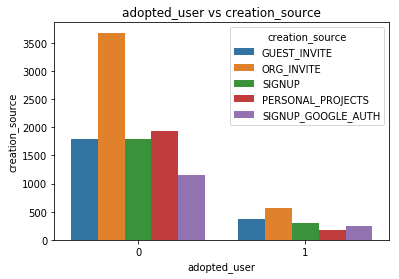

Looks like creation_source = org_invite tends to have higher non-adopted users


In [315]:
sns.countplot(x="adopted_user", hue="creation_source", data=df_user_truncated)
plt.title('adopted_user vs creation_source')
plt.xlabel('adopted_user')
plt.ylabel('creation_source')
plt.show()

print('Looks like creation_source = org_invite tends to have higher non-adopted users')

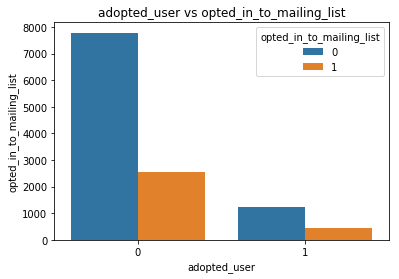

No obvious trend.


In [316]:
sns.countplot(x="adopted_user", hue="opted_in_to_mailing_list", data=df_user_truncated)
plt.title('adopted_user vs opted_in_to_mailing_list')
plt.xlabel('adopted_user')
plt.ylabel('opted_in_to_mailing_list')
plt.show()

print('No obvious trend.')

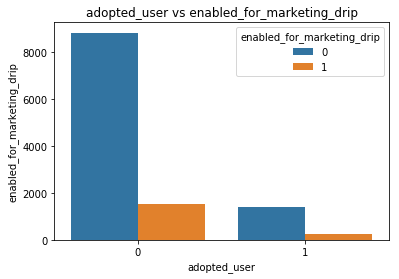

No obvious trend.


In [317]:
sns.countplot(x="adopted_user", hue="enabled_for_marketing_drip", data=df_user_truncated)
plt.title('adopted_user vs enabled_for_marketing_drip')
plt.xlabel('adopted_user')
plt.ylabel('enabled_for_marketing_drip')
plt.show()

print('No obvious trend.')

In [311]:
df_user_truncated.groupby('org_id').sum().sort_values(by=['adopted_user'],ascending = False).iloc[1:6]
# Looks like there are more adopted_users when belonging to certain organization

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,duration,adopted_user
org_id,,,,,
1,45,20,614650.0,8958.478862,16
7,29,23,286736.0,6972.522045,16
2,36,27,637731.0,8156.826590,15
13,22,16,253007.0,5459.434999,14
9,36,15,432813.0,5707.652499,14


In [313]:
# For example, when belonging to org_id = 1, 16 users become adopted users, at 6.8%.

print(df_user_truncated[df_user_truncated.org_id == 1].sum().adopted_user/len(df_user_truncated[df_user_truncated.org_id == 1]))
df_user_truncated[df_user_truncated.org_id == 1].head()

0.06866952789699571


,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,adopted_user
1,ORG_INVITE,0,0,1,316.0,135.000000,1
3,GUEST_INVITE,0,0,1,5151.0,0.000000,0
146,ORG_INVITE,0,0,1,10368.0,0.000000,0
162,PERSONAL_PROJECTS,0,0,1,0.0,58.565227,0
210,ORG_INVITE,1,0,1,5107.0,0.000000,0


In [318]:
# For example, when belonging to org_id = 7, 16 users become adopted users, at 13.4%.

print(df_user_truncated[df_user_truncated.org_id == 7].sum().adopted_user/len(df_user_truncated[df_user_truncated.org_id == 7]))
df_user_truncated[df_user_truncated.org_id == 7].head()

0.13445378151260504


,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,adopted_user
21,ORG_INVITE,0,0,7,2994.0,0.0,0
172,PERSONAL_PROJECTS,1,0,7,0.0,0.0,0
227,ORG_INVITE,1,1,7,5650.0,2.0,0
234,PERSONAL_PROJECTS,0,0,7,0.0,3.0,0
235,GUEST_INVITE,0,0,7,3452.0,0.0,0


In [300]:
df_user_truncated.groupby('invited_by_user_id').sum().sort_values(by=['adopted_user'],ascending = False).iloc[1:6]
# Looks like there are more adopted_users when invited by certain users

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,duration,adopted_user
invited_by_user_id,,,,,
10628.0,3,0,820,837.130454,4
2354.0,0,0,600,1335.130454,4
730.0,4,1,1080,760.000000,3
7358.0,0,0,1380,1499.000000,3
1656.0,4,1,2368,677.565227,3


In [308]:
# For example, when invited by user_id 10628, 4 users become adopted users, at 40%.

print(df_user_truncated[df_user_truncated.invited_by_user_id == 10628.0].sum().adopted_user/len(df_user_truncated[df_user_truncated.invited_by_user_id == 10628.0]))
df_user_truncated[df_user_truncated.invited_by_user_id == 10628.0]

0.4


,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,adopted_user
383,GUEST_INVITE,0,0,82,10628.0,58.565227,0
2289,GUEST_INVITE,0,0,82,10628.0,106.000000,1
2671,ORG_INVITE,1,0,82,10628.0,514.000000,1
3853,ORG_INVITE,0,0,82,10628.0,2.000000,0
4134,ORG_INVITE,0,0,82,10628.0,58.565227,0
5372,ORG_INVITE,0,0,82,10628.0,0.000000,0
10338,GUEST_INVITE,1,0,82,10628.0,26.000000,1
10638,ORG_INVITE,0,0,82,10628.0,71.000000,1
11559,ORG_INVITE,1,0,82,10628.0,0.000000,0
11904,ORG_INVITE,0,0,82,10628.0,1.000000,0


In [309]:
# Another example, when invited by user_id 2354, 4 users become adopted users, at 40% as well.

print(df_user_truncated[df_user_truncated.invited_by_user_id == 2354.0].sum().adopted_user/len(df_user_truncated[df_user_truncated.invited_by_user_id == 2354.0]))
df_user_truncated[df_user_truncated.invited_by_user_id == 2354.0]

0.4


,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,adopted_user
145,ORG_INVITE,0,0,60,2354.0,447.000000,1
2062,ORG_INVITE,0,0,60,2354.0,25.000000,0
2767,GUEST_INVITE,0,0,60,2354.0,0.000000,0
2903,ORG_INVITE,0,0,60,2354.0,58.565227,0
3940,ORG_INVITE,0,0,60,2354.0,0.000000,0
4089,GUEST_INVITE,0,0,60,2354.0,278.000000,1
4585,GUEST_INVITE,0,0,60,2354.0,58.565227,0
5072,ORG_INVITE,0,0,60,2354.0,279.000000,1
9698,GUEST_INVITE,0,0,60,2354.0,189.000000,1
10919,ORG_INVITE,0,0,60,2354.0,0.000000,0


Text(0,0.5,'duration')

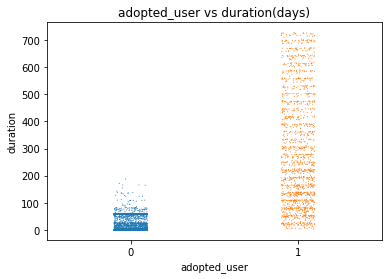

In [273]:
sns.stripplot(x='adopted_user',y='duration',data=df_user_truncated,jitter=True,size=1)
plt.title('adopted_user vs duration(days)')
plt.xlabel('adopted_user')
plt.ylabel('duration')
plt.show()

print('Looks like the longer the duration, the more likely the adopted user.')

In [ ]:
# 'creation_source' is categorical therefore needs to be encoded.

In [319]:
from sklearn import preprocessing

In [344]:
df_user_truncated_working = df_user_truncated.copy()

In [345]:
le = preprocessing.LabelEncoder()
le.fit(df_user_truncated_working.creation_source.values)
print(le.classes_)
labels_list = le.transform(df_user_truncated_working.creation_source.values)
df_user_truncated_working['creation_source'] = labels_list 

['GUEST_INVITE' 'ORG_INVITE' 'PERSONAL_PROJECTS' 'SIGNUP'
 'SIGNUP_GOOGLE_AUTH']


In [346]:
df_user_truncated_working.head(5)

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,duration,adopted_user
0,0,1,0,11,10803.0,0.0,0
1,1,0,0,1,316.0,135.0,1
2,1,0,0,94,1525.0,0.0,0
3,0,0,0,1,5151.0,0.0,0
4,0,0,0,193,5240.0,4.0,0


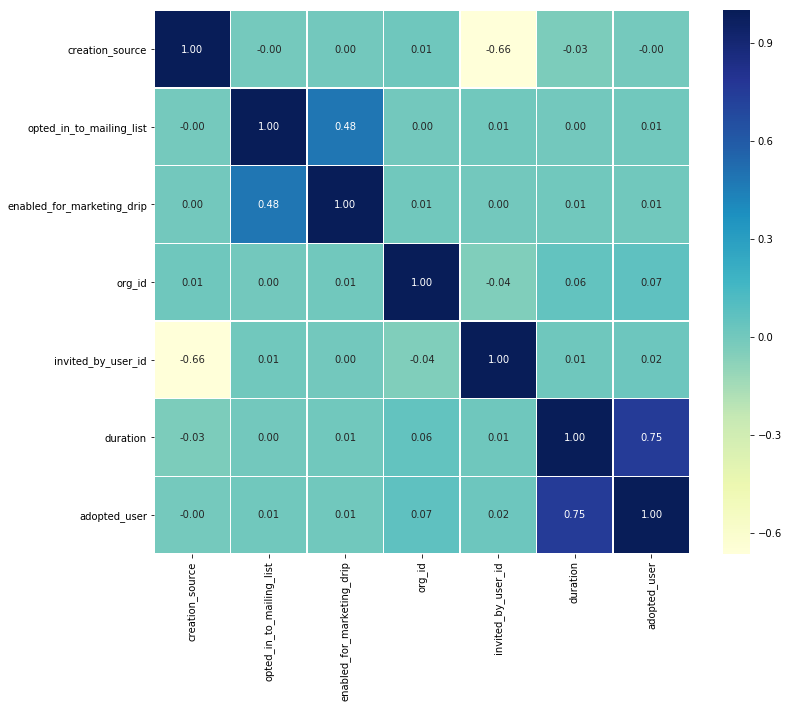

In [348]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.heatmap(df_user_truncated_working.corr(method='pearson'),linewidths=.5,annot=True, fmt='.2f',cmap="YlGnBu")
plt.show()

# Based on plotting the Pearson correlations on a heatmap, duration has the highest correlation with users becoming adopted users

### Build Predictive Model

In [359]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [356]:
# Pick out the features for training
f_bool = df_user_truncated_working.columns != 'adopted_user'
features = list(df_user_truncated_working.columns[f_bool])
features

['creation_source',
 'opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'org_id',
 'invited_by_user_id',
 'duration']

In [357]:
# Splitting data into training and test set @ 7:3 ratio

X_train, X_test, y_train, y_test = train_test_split(df_user_truncated_working[features],df_user_truncated_working['adopted_user'], test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8400, 6)
(3600, 6)
(8400,)
(3600,)


In [360]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\King Wong\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\King Wong\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\King Wong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [365]:
# Build a prediction model using logistic regression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train_scaled,y_train)
logreg_score = logreg.score(X_test_scaled,y_test)
print("Logistic regression model score: {}".format(logreg_score))

Logistic regression model score: 0.9694444444444444


In [366]:
logreg_coef = [features,list(logreg.coef_[0])]
df_logreg_coef = pd.DataFrame(logreg_coef, index=['feature','coef'])
df_logreg_coef.transpose().sort_values('coef', ascending=False)

,feature,coef
5,duration,6.4825
0,creation_source,0.494481
4,invited_by_user_id,0.332998
3,org_id,0.154833
1,opted_in_to_mailing_list,0.0827042
2,enabled_for_marketing_drip,0.0505453


In sum, the best predictor is duration, similar to as shown in heatmap previously. This means the longer the user stays active, the more likely the user becomes an adopted user. 